This script generates the allele frequency spectra in the main text and in the supplementary. It also generates statistics for the proportion of mutations that are driver etc etc.

In [1]:
%pylab inline
import pandas as pd
import seaborn as sns
from glob import glob
sns.set_style("white")
sns.despine()
# sns.set_context('talk')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

from scipy import optimize

Populating the interactive namespace from numpy and matplotlib


In [2]:
# RED =  sns.xkcd_rgb["pale red"]
# GREEN = sns.xkcd_rgb["medium green"]
# BLUE = sns.xkcd_rgb["denim blue"]

def widths(arr):
    index = 0
    while index < len(arr)-1:
        yield arr[index+1] - arr[index]
        index += 1

def neighbour_iterator(arr):
    index = 0
    while index < len(arr)-1:
        yield (arr[index], arr[index+1])
        index += 1

numbins = 100

# binrange = np.linspace(0.00006, 0.005, num=40, endpoint=False).tolist() + np.linspace(0.005,1,num=500).tolist()

# binrange = np.linspace(0, 1, num=100)*(np.exp(0.1)-1)

binrange = np.logspace(np.log10(0.0001), np.log10(1), num=50)

In [17]:
# _, GREEN, RED, _, _, BLUE = sns.color_palette('colorblind')
RED, BLUE, GREEN = sns.xkcd_palette(["amber", "dusty purple", "faded green"])
# RED, BLUE, GREEN = sns.color_palette("cubehelix", 3)
sns.set_context('paper', font_scale=1.5)


def freq_plot(ax, mappings, colors_ = [RED, GREEN, BLUE], labels_ = ['No Turnover', 'Surface Turnover', 'Turnover']):
    lines = []
    labels = []
    for mapping, color, model_name in zip(mappings, colors_, labels_):

        replicates = glob(mapping)
#         print(replicates)
        all_xs = []
        all_muts = []
        all_drvs = []
        
        all_muts_or = []
        all_drvs_or = []

        for replicate_folder in replicates:
            try:
                datafile = glob(replicate_folder+'/all_PMs*.dat')[0]
                muts = pd.read_csv(datafile, sep=' ', names=['Num', 'SNP', 'abundancy'])

                y, x = np.histogram(muts.abundancy, bins=binrange)
                
                all_muts_or.append(y.copy())
                y = [ y_ / float(w_) for y_, w_ in zip(y.tolist(), list(widths(x)))]
        
                x_meaned = np.mean(np.array(list(neighbour_iterator(x))), axis=1)
                all_muts.append(y)        
                all_xs.append(x_meaned)

                
            except Exception as e:
                print 'Could not find file:'+str(replicate_folder)+' '+str(e)

        y = np.mean(np.array(all_muts), axis=0)
        y_or = np.mean(np.array(all_muts_or), axis=0)
        x_meaned = np.mean(np.array(all_xs), axis=0)

        y_keep = y!=0

        y1_x_plt = np.log10(x_meaned[y_keep])
        y1_plt = np.log10(y[y_keep]).astype(np.float)

        print model_name+':'
        f_sum = np.around(np.sum(y_or),decimals=2)
        print 'FREQ_SUM:'+str(f_sum)

        lines += ax.plot(y1_x_plt,y1_plt,'o',color=color, alpha=1, label=str(model_name) +' $S$='+str(f_sum))
        labels += [str(model_name) +' $S$='+str(f_sum)]
        ax.plot(np.log10(np.ones(40)*0.0001), np.linspace(0, 15, num=40), '--', color='gray')
        
    return lines, labels



Populating the interactive namespace from numpy and matplotlib
['/Volumes/Stockage/neutral/0_0_0_outs_1', '/Volumes/Stockage/neutral/0_0_0_outs_100', '/Volumes/Stockage/neutral/0_0_0_outs_111', '/Volumes/Stockage/neutral/0_0_0_outs_2']


`%matplotlib` prevents importing * from pylab and numpy


No Selection:
FREQ_SUM:2832.5
['/Volumes/Stockage/neutral/1_0_0_big_outs_1', '/Volumes/Stockage/neutral/1_0_0_big_outs_2', '/Volumes/Stockage/neutral/1_0_0_big_outs_3', '/Volumes/Stockage/neutral/1_0_0_big_outs_4']
Selection:
FREQ_SUM:3735.25


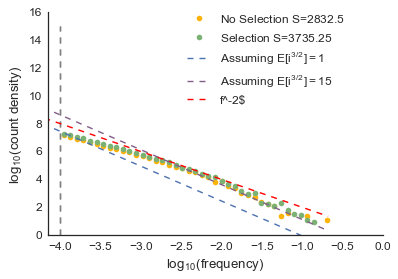

In [8]:
import numpy as np
import seaborn as sns
%pylab inline
from scipy import stats, optimize


pi = np.pi
mu = 0.02

root_folder = '/Volumes/Stockage/neutral/'
mappings = [ root_folder+'/0_0_0_outs*',
             root_folder+'/1_0_0_big*']

fig = plt.figure(figsize=(6,4))
f = np.linspace(0.000001,0.21,num=1000)

ax = fig.add_subplot(111)

freq_plot(ax, mappings, labels_=['No Selection', 'Selection'])

ax.set_xlabel('$log_{10}(frequency)$')
ax.set_ylabel('$log_{10}($count density)')
ax.plot(np.log10(f), np.log10((mu/(4*np.sqrt(np.pi)))*f**(-2.5)), '--', label='Assuming $E[i^{3/2}]=1$')
ax.plot(np.log10(f), np.log10((15*mu/(4*np.sqrt(np.pi)))*f**(-2.5)), '--', label='Assuming $E[i^{3/2}]=15$', color=BLUE)
ax.plot(np.log10(f), np.log10(f**(-2)), '--', label='f^-2$', color='r')
# ax.plot(np.log10(f), np.log10(f**(-2)*1/(4*np.sqrt(np.pi))), '--', label='f^-2$')
# ax.plot(np.log10(f), np.log10(1/f*(f+1)), '--', label='1/f(f+1)$')

ax.set_xlim([-4.15, 0.])
ax.set_ylim(bottom=0)
ax.legend(fontsize=12,loc=(0.4,0.56))
sns.despine()
# ax.set_title('No Turnover')
# plt.savefig('./afs-analytical.pdf')

# how does death rate in no selection simulations change the from the theoretical prediction? 

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


d=0:
FREQ_SUM:3774.33
d=0.05:
FREQ_SUM:3837.67
d=0.1:
FREQ_SUM:4032.33
d=0.2:
FREQ_SUM:4492.33
d=0.65:
FREQ_SUM:22564.0
d=0:
FREQ_SUM:6961.9
d=0.05:
FREQ_SUM:7294.4
d=0.1:
FREQ_SUM:7631.5
d=0.2:
FREQ_SUM:8281.5
Could not find file:/Volumes/Stockage/u0.03simulations/1_0_065_outs_101 list index out of range
Could not find file:/Volumes/Stockage/u0.03simulations/1_0_065_outs_2 list index out of range
d=0.65:
FREQ_SUM:40919.38
d=0:
FREQ_SUM:3704.0
d=0.05:
FREQ_SUM:3932.33
d=0.1:
FREQ_SUM:3964.0
d=0.2:
FREQ_SUM:4423.0
d=0.65:
FREQ_SUM:7995.0


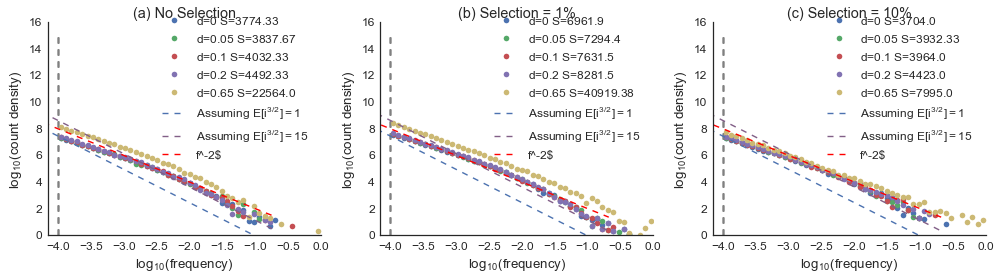

In [23]:
import numpy as np
import seaborn as sns
%pylab inline

pi = np.pi
mu = 0.02

root_folder = '/Volumes/Stockage/January2018Simulations/model/'
mappings = [ root_folder+'/0_0_0_outs*',
             root_folder+'/0_0_005_outs*',
             root_folder+'/0_0_01_outs*',
             root_folder+'/0_0_02_outs*',
             root_folder+'/0_0_065_outs*']

fig = plt.figure(figsize=(14,4))
f = np.linspace(0.000001,0.21,num=1000)

ax = fig.add_subplot(131)

freq_plot(ax, mappings, colors_=sns.color_palette(n_colors=5),labels_=['d=0', 'd=0.05', 'd=0.1', 'd=0.2', 'd=0.65'])

ax.set_xlabel('$log_{10}(frequency)$')
ax.set_ylabel('$log_{10}($count density)')
ax.plot(np.log10(f), np.log10((mu/(4*np.sqrt(np.pi)))*f**(-2.5)), '--', label='Assuming $E[i^{3/2}]=1$')
ax.plot(np.log10(f), np.log10((15*mu/(4*np.sqrt(np.pi)))*f**(-2.5)), '--', label='Assuming $E[i^{3/2}]=15$', color=BLUE)
ax.plot(np.log10(f), np.log10(f**(-2)), '--', label='f^-2$', color='r')
# ax.plot(np.log10(f), np.log10(f**(-2)*1/(4*np.sqrt(np.pi))), '--', label='f^-2$')
# ax.plot(np.log10(f), np.log10(1/f*(f+1)), '--', label='1/f(f+1)$')

ax.set_xlim([-4.15, 0.])
ax.set_ylim(bottom=0)
ax.legend(fontsize=12,loc=(0.4,0.33))
sns.despine()
ax.set_title('(a) No Selection')



root_folder = '/Volumes/Stockage/u0.03simulations/'

mappings = [ root_folder+'1_0_0_*',
            root_folder+'1_0_005_*',
           root_folder+'1_0_01_*',
           root_folder+'1_0_02_*',
           root_folder+'1_0_065_*']

ax = fig.add_subplot(132)

freq_plot(ax, mappings, colors_=sns.color_palette(n_colors=5),labels_=['d=0', 'd=0.05', 'd=0.1', 'd=0.2', 'd=0.65'])

ax.set_xlabel('$log_{10}(frequency)$')
ax.set_ylabel('$log_{10}($count density)')
ax.plot(np.log10(f), np.log10((mu/(4*np.sqrt(np.pi)))*f**(-2.5)), '--', label='Assuming $E[i^{3/2}]=1$')
ax.plot(np.log10(f), np.log10((15*mu/(4*np.sqrt(np.pi)))*f**(-2.5)), '--', label='Assuming $E[i^{3/2}]=15$', color=BLUE)
ax.plot(np.log10(f), np.log10(f**(-2)), '--', label='f^-2$', color='r')
# ax.plot(np.log10(f), np.log10(f**(-2)*1/(4*np.sqrt(np.pi))), '--', label='f^-2$')
# ax.plot(np.log10(f), np.log10(1/f*(f+1)), '--', label='1/f(f+1)$')

ax.set_xlim([-4.15, 0.])
ax.set_ylim(bottom=0)
ax.legend(fontsize=12,loc=(0.4,0.33))
sns.despine()
ax.set_title('(b) Selection = 1%')



root_folder = '/Volumes/Stockage/January2018Simulations/model/'
mappings = [ root_folder+'/10_0_0_outs*',
             root_folder+'/10_0_005_outs*',
             root_folder+'/10_0_01_outs*',
             root_folder+'/10_0_02_outs*',
             root_folder+'/10_0_065_outs*']

ax = fig.add_subplot(133)

freq_plot(ax, mappings, colors_=sns.color_palette(n_colors=5),labels_=['d=0', 'd=0.05', 'd=0.1', 'd=0.2', 'd=0.65'])

ax.set_xlabel('$log_{10}(frequency)$')
ax.set_ylabel('$log_{10}($count density)')
ax.plot(np.log10(f), np.log10((mu/(4*np.sqrt(np.pi)))*f**(-2.5)), '--', label='Assuming $E[i^{3/2}]=1$')
ax.plot(np.log10(f), np.log10((15*mu/(4*np.sqrt(np.pi)))*f**(-2.5)), '--', label='Assuming $E[i^{3/2}]=15$', color=BLUE)
ax.plot(np.log10(f), np.log10(f**(-2)), '--', label='f^-2$', color='r')
# ax.plot(np.log10(f), np.log10(f**(-2)*1/(4*np.sqrt(np.pi))), '--', label='f^-2$')
# ax.plot(np.log10(f), np.log10(1/f*(f+1)), '--', label='1/f(f+1)$')

ax.set_xlim([-4.15, 0.])
ax.set_ylim(bottom=0)
ax.legend(fontsize=12,loc=(0.4,0.33))
sns.despine()
ax.set_title('(c) Selection = 10%')
fig.tight_layout()

# ax.set_title('No Turnover')
plt.savefig('./afs-different_selection_rates.pdf', dpi=300)